In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('AllOdiPlayers.csv')

In [4]:
df.head()

,No,Name,First,Last,Mat,Inn,NO,Runs,HS,Avg,Balls,Mdn,Runs.1,Wkt,BBM,Avg.1,Ca,St
0,1,Syed Abid Ali,1974,1975,5,3,0,93,70,31.00,336,10,187,7,22-Feb,26.71,0,0
1,2,Bishan Singh Bedi,1974,1979,10,7,2,31,13,6.20,590,17,340,7,Feb-44,48.57,4,0
2,3,Farokh Engineer,1974,1975,5,4,1,114,54*,38.00,0,0,0,0,0,0.00,3,1
3,4,Sunil Gavaskar,1974,1987,108,102,14,3092,103*,35.13,20,0,25,1,10-Jan,25.00,22,0
4,5,Madan Lal,1974,1987,67,35,14,401,53*,19.09,3164,44,2137,73,20-Apr,29.27,18,0


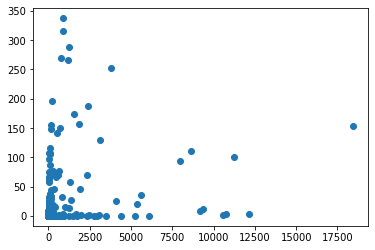

In [5]:
plt.scatter(df['Runs'],df['Wkt'])

In [6]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Runs','Wkt']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
df['cluster']=y_predicted
df.head()

,No,Name,First,Last,Mat,Inn,NO,Runs,HS,Avg,Balls,Mdn,Runs.1,Wkt,BBM,Avg.1,Ca,St,cluster
0,1,Syed Abid Ali,1974,1975,5,3,0,93,70,31.00,336,10,187,7,22-Feb,26.71,0,0,0
1,2,Bishan Singh Bedi,1974,1979,10,7,2,31,13,6.20,590,17,340,7,Feb-44,48.57,4,0,0
2,3,Farokh Engineer,1974,1975,5,4,1,114,54*,38.00,0,0,0,0,0,0.00,3,1,0
3,4,Sunil Gavaskar,1974,1987,108,102,14,3092,103*,35.13,20,0,25,1,10-Jan,25.00,22,0,0
4,5,Madan Lal,1974,1987,67,35,14,401,53*,19.09,3164,44,2137,73,20-Apr,29.27,18,0,0


In [8]:
km.cluster_centers_

array([[ 383.31578947,   25.55701754],
       [9283.61538462,   41.76923077]])

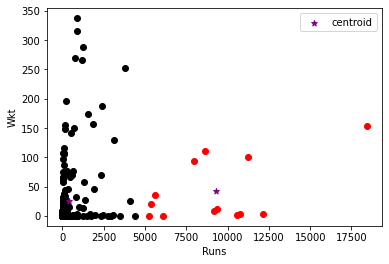

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.Runs,df1['Wkt'],color='black')
plt.scatter(df2.Runs,df2['Wkt'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Runs')
plt.ylabel('Wkt')
plt.legend()

In [14]:
#Preprocessing

scaler = MinMaxScaler()

scaler.fit(df[['Wkt']])
df['Wkt'] = scaler.transform(df[['Wkt']])

scaler.fit(df[['Runs']])
df['Runs'] = scaler.transform(df[['Runs']])



In [15]:
df.head()

,No,Name,First,Last,Mat,Inn,NO,Runs,HS,Avg,Balls,Mdn,Runs.1,Wkt,BBM,Avg.1,Ca,St,cluster
0,1,Syed Abid Ali,1974,1975,5,3,0,0.005047,70,31.00,336,10,187,0.020772,22-Feb,26.71,0,0,0
1,2,Bishan Singh Bedi,1974,1979,10,7,2,0.001682,13,6.20,590,17,340,0.020772,Feb-44,48.57,4,0,0
2,3,Farokh Engineer,1974,1975,5,4,1,0.006187,54*,38.00,0,0,0,0.000000,0,0.00,3,1,0
3,4,Sunil Gavaskar,1974,1987,108,102,14,0.167806,103*,35.13,20,0,25,0.002967,10-Jan,25.00,22,0,0
4,5,Madan Lal,1974,1987,67,35,14,0.021763,53*,19.09,3164,44,2137,0.216617,20-Apr,29.27,18,0,0


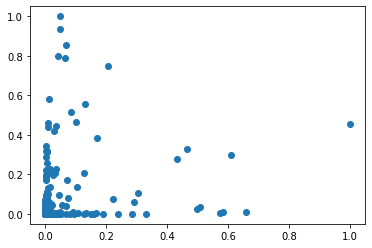

In [16]:
plt.scatter(df.Runs,df['Wkt'])

In [18]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Runs','Wkt']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
df['cluster']=y_predicted
df.head()

,No,Name,First,Last,Mat,Inn,NO,Runs,HS,Avg,Balls,Mdn,Runs.1,Wkt,BBM,Avg.1,Ca,St,cluster
0,1,Syed Abid Ali,1974,1975,5,3,0,0.005047,70,31.00,336,10,187,0.020772,22-Feb,26.71,0,0,0
1,2,Bishan Singh Bedi,1974,1979,10,7,2,0.001682,13,6.20,590,17,340,0.020772,Feb-44,48.57,4,0,0
2,3,Farokh Engineer,1974,1975,5,4,1,0.006187,54*,38.00,0,0,0,0.000000,0,0.00,3,1,0
3,4,Sunil Gavaskar,1974,1987,108,102,14,0.167806,103*,35.13,20,0,25,0.002967,10-Jan,25.00,22,0,0
4,5,Madan Lal,1974,1987,67,35,14,0.021763,53*,19.09,3164,44,2137,0.216617,20-Apr,29.27,18,0,0


In [21]:
km.cluster_centers_

array([[0.03536935, 0.03147034],
       [0.15575581, 0.52354535]])

In [22]:
df

,No,Name,First,Last,Mat,Inn,NO,Runs,HS,Avg,Balls,Mdn,Runs.1,Wkt,BBM,Avg.1,Ca,St,cluster
0,1,Syed Abid Ali,1974,1975,5,3,0,0.005047,70,31.00,336,10,187,0.020772,22-Feb,26.71,0,0,0
1,2,Bishan Singh Bedi,1974,1979,10,7,2,0.001682,13,6.20,590,17,340,0.020772,Feb-44,48.57,4,0,0
2,3,Farokh Engineer,1974,1975,5,4,1,0.006187,54*,38.00,0,0,0,0.000000,0,0.00,3,1,0
3,4,Sunil Gavaskar,1974,1987,108,102,14,0.167806,103*,35.13,20,0,25,0.002967,10-Jan,25.00,22,0,0
4,5,Madan Lal,1974,1987,67,35,14,0.021763,53*,19.09,3164,44,2137,0.216617,20-Apr,29.27,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,Rahul Chahar,2021,2021,1,1,0,0.000706,13,13.00,60,0,54,0.008902,Mar-54,18.00,0,0,0
237,238,Krishnappa Gowtham,2021,2021,1,1,0,0.000109,2,2.00,48,0,49,0.002967,Jan-49,49.00,1,0,0
238,239,Nitish Rana,2021,2021,1,1,0,0.000380,7,7.00,18,0,10,0.000000,0,0.00,0,0,0
239,240,Chetan Sakariya,2021,2021,1,1,0,0.000000,0*,0.00,48,0,34,0.005935,Feb-34,17.00,2,0,0


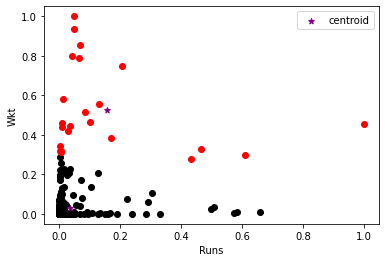

In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.Runs,df1['Wkt'],color='black')
plt.scatter(df2.Runs,df2['Wkt'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Runs')
plt.ylabel('Wkt')
plt.legend()

In [24]:
# Elbow Plot
sse = []
k_rng = range(1,10)
for k in k_rng:
 km = KMeans(n_clusters=k)
 km.fit(df[['Runs','Wkt']])
 sse.append(km.inertia_)


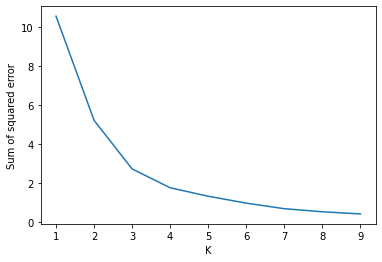

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)


In [32]:
for i in range(len(df['No'])):
    if df.cluster[i] == 0:
        str1 = "Bowler"
    else:
        str1 = "Batsman"
    print(df.Name[i], " is a ", str1)

Syed Abid Ali  is a  Bowler
Bishan Singh Bedi  is a  Bowler
Farokh Engineer  is a  Bowler
Sunil Gavaskar  is a  Bowler
Madan Lal  is a  Bowler
Sudhir Naik  is a  Bowler
Brijesh Patel  is a  Bowler
Eknath Solkar  is a  Bowler
Srinivasaraghavan Venkataraghavan  is a  Bowler
Gundappa Viswanath  is a  Bowler
Ajit Wadekar  is a  Bowler
Gopal Bose  is a  Bowler
Ashok Mankad  is a  Bowler
Mohinder Amarnath  is a  Bowler
Anshuman Gaekwad  is a  Bowler
Karsan Ghavri  is a  Bowler
Syed Kirmani  is a  Bowler
Parthasarathy Sharma  is a  Bowler
Dilip Vengsarkar  is a  Bowler
B. S. Chandrasekhar  is a  Bowler
Pochiah Krishnamurthy  is a  Bowler
Sudhakar Rao  is a  Bowler
Surinder Amarnath  is a  Bowler
Chetan Chauhan  is a  Bowler
Kapil Dev  is a  Batsman
Yashpal Sharma  is a  Bowler
Bharath Reddy  is a  Bowler
Surinder Khanna  is a  Bowler
Kirti Azad  is a  Bowler
Roger Binny  is a  Bowler
Dilip Doshi  is a  Bowler
Sandeep Patil  is a  Bowler
T. E. Srinivasan  is a  Bowler
Yograj Singh  is a  Bowle